Go through a HOPE file and compute the dist in each pixel

1. read in a L2SA file
1. plot a spectrogram
1. read in the L1 file
1. Collect up all the data for each bin
1. build stats for each pixel and save (how...?)
1. make spectrograms where we sameple each differently and look at them all

In [8]:
import spacepy.pycdf as pycdf
import spacepy.pycdf.istp as istp
import spacepy.plot as splot
import spacepy.datamodel as dm

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pymc3 as pm


sns.set(font_scale=1.5)

In [2]:
l2SAfname = '/Users/balarsen/Downloads/rbspa_rel04_ect-hope-sci-L2SA_20161210_v6.2.0.cdf'
l2SA = pycdf.CDF(l2SAfname)
l2SA

<CDF:
Acquisition_Period: CDF_REAL4 [7612]
B_Calc_Ele: CDF_REAL4 [4138]
B_Calc_Ion: CDF_REAL4 [3474]
B_Eq_Ele: CDF_REAL4 [4138]
B_Eq_Ion: CDF_REAL4 [3474]
Detector_LABL: CDF_CHAR*2 [5] NRV
ENERGY_Ele_DELTA: CDF_REAL4 [4138, 72]
ENERGY_Ion_DELTA: CDF_REAL4 [3474, 72]
ESA_Polarity: CDF_UINT1 [7612]
ESA_Sweep: CDF_UINT1 [7612]
ESA_Volt: CDF_REAL4 [7612, 72]
ESA_Volt_LABL_1: CDF_CHAR*7 [72] NRV
Energy_Collapsed: CDF_UINT1 [7612]
Energy_LABL: CDF_CHAR*3 [72] NRV
Epoch: CDF_EPOCH [7612]
Epoch_Ele: CDF_EPOCH [4138]
Epoch_Ele_DELTA: CDF_REAL4 [4138]
Epoch_Ion: CDF_EPOCH [3474]
Epoch_Ion_DELTA: CDF_REAL4 [3474]
FESA: CDF_FLOAT [4138, 72]
FHESA: CDF_FLOAT [3474, 72]
FLAGS: CDF_CHAR*122 [8] NRV
FOSA: CDF_FLOAT [3474, 72]
FPSA: CDF_FLOAT [3474, 72]
Flags_Ele: CDF_UINT1 [4138, 8]
Flags_Ion: CDF_UINT1 [3474, 8]
HOPE_ENERGY_Ele: CDF_REAL4 [4138, 72]
HOPE_ENERGY_Ion: CDF_REAL4 [3474, 72]
I_Ele: CDF_REAL4 [4138]
I_Ion: CDF_REAL4 [3474]
L_Ele: CDF_REAL4 [4138]
L_Ion: CDF_REAL4 [3474]
L_star_Ele: CDF_REA

In [3]:
b = istp.VarBundle(l2SA['FPSA'])
b

<VarBundle:
FPSA: CDF_FLOAT [3474, 72]
Epoch_Ion: CDF_EPOCH [3474]
    Epoch_Ion_DELTA: CDF_REAL4 [3474]
HOPE_ENERGY_Ion: CDF_REAL4 [3474, 72]
    ENERGY_Ion_DELTA: CDF_REAL4 [3474, 72]
    Energy_LABL: CDF_CHAR*3 [72] NRV
>

In [7]:
b.variables()

[[('FPSA', (3474, 72))],
 [('Epoch_Ion', (3474,)), ('Epoch_Ion_DELTA', (3474,))],
 [('HOPE_ENERGY_Ion', (3474, 72)),
  ('ENERGY_Ion_DELTA', (3474, 72)),
  ('Energy_LABL', (72,))]]

In [17]:
dat = dm.SpaceData({'Epoch_Ion':dm.dmarray(l2SA['Epoch_Ion'][...]), 
                   'HOPE_ENERGY_Ion':dm.dmarray(l2SA['HOPE_ENERGY_Ion'][...][0]), 
                   'FPSA':dm.dmarray(l2SA['FPSA'][...])})
dat.tree(verbose=1)

+
|____Epoch_Ion (spacepy.datamodel.dmarray (3474,))
|____FPSA (spacepy.datamodel.dmarray (3474, 72))
|____HOPE_ENERGY_Ion (spacepy.datamodel.dmarray (72,))


In [26]:
np.unique(l2SA['HOPE_ENERGY_Ion'][...][:,0])

array([ 0.9849  , 24.974249], dtype=float32)

In [29]:
apogee_ind = l2SA['HOPE_ENERGY_Ion'][...][:,0] < 1
pergiee_ind = ~apogee_ind
l2SAa_apogee = dm.SpaceData({'Epoch_Ion':dm.dmarray(l2SA['Epoch_Ion'][...][apogee_ind]), 
                   'HOPE_ENERGY_Ion':dm.dmarray(l2SA['HOPE_ENERGY_Ion'][...][apogee_ind][0]), 
                   'FPSA':dm.dmarray(l2SA['FPSA'][...][apogee_ind])})
l2SAa_apogee.tree(verbose=True)

+
|____Epoch_Ion (spacepy.datamodel.dmarray (3192,))
|____FPSA (spacepy.datamodel.dmarray (3192, 72))
|____HOPE_ENERGY_Ion (spacepy.datamodel.dmarray (72,))


In [30]:
l2SAa_pergiee = dm.SpaceData({'Epoch_Ion':dm.dmarray(l2SA['Epoch_Ion'][...][pergiee_ind]), 
                   'HOPE_ENERGY_Ion':dm.dmarray(l2SA['HOPE_ENERGY_Ion'][...][pergiee_ind][0]), 
                   'FPSA':dm.dmarray(l2SA['FPSA'][...][pergiee_ind])})
l2SAa_pergiee.tree(verbose=True)

+
|____Epoch_Ion (spacepy.datamodel.dmarray (282,))
|____FPSA (spacepy.datamodel.dmarray (282, 72))
|____HOPE_ENERGY_Ion (spacepy.datamodel.dmarray (72,))


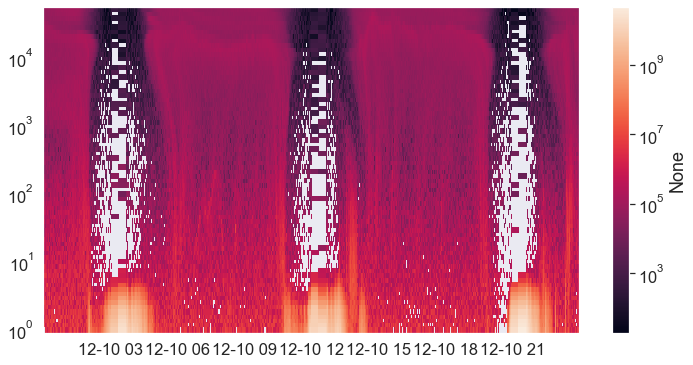

In [34]:
fig, ax = plt.subplots(figsize=(12,6))
splot.simpleSpectrogram(l2SAa_apogee['Epoch_Ion'], l2SAa_apogee['HOPE_ENERGY_Ion'], l2SAa_apogee['FPSA'], ax=ax)
# splot.simpleSpectrogram(l2SAa_pergiee['Epoch_Ion'], l2SAa_pergiee['HOPE_ENERGY_Ion'], l2SAa_pergiee['FPSA'], ax=ax)


In [18]:
splot.spectrogram(dat, variables=['Epoch_Ion', 'HOPE_ENERGY_Ion', 'FPSA'])

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 3474 and the array at index 1 has size 72